@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to redict profit of the company based on
        different expenses
        using `Multiple Linear Regression`<br>

<br>**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<br>**Importing Dataset**

In [ ]:
company_df = pd.read_csv('/content/Startups.csv')
display(company_df.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<br>**Structure and Stats of the dataset**

In [ ]:
company_df.info()
print("\nStats for the dataset are:")
company_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB

Stats for the dataset are:


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Creating the pair plot**

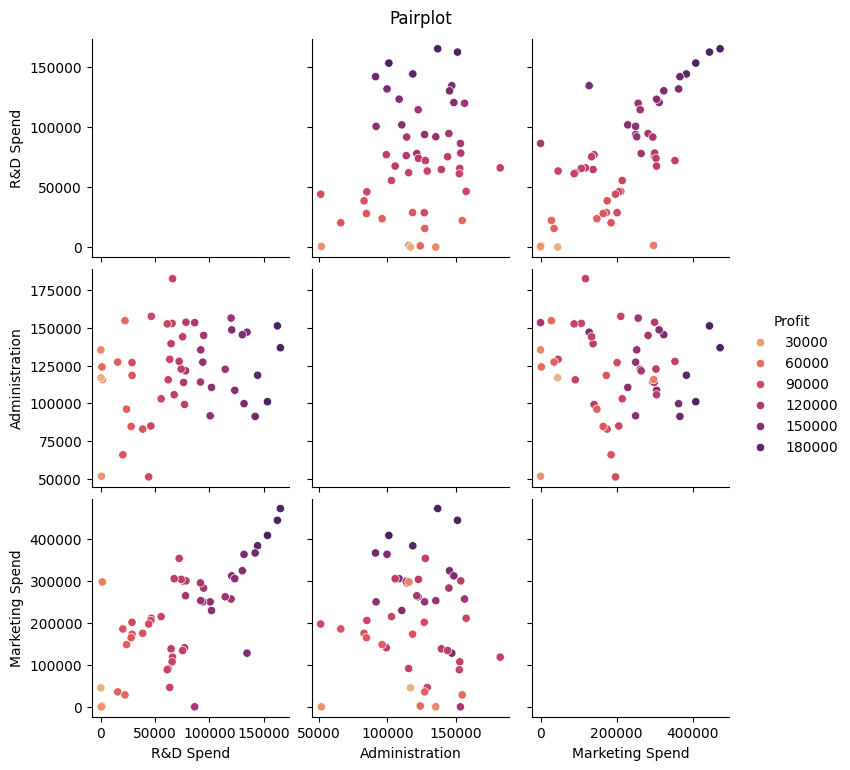

In [ ]:
sns.pairplot(company_df, diag_kind='kde', hue="Profit", palette='flare')

plt.suptitle('Pairplot', y=1.02)
plt.show()

<br>**Visualize the relationship between years of experience and salary**

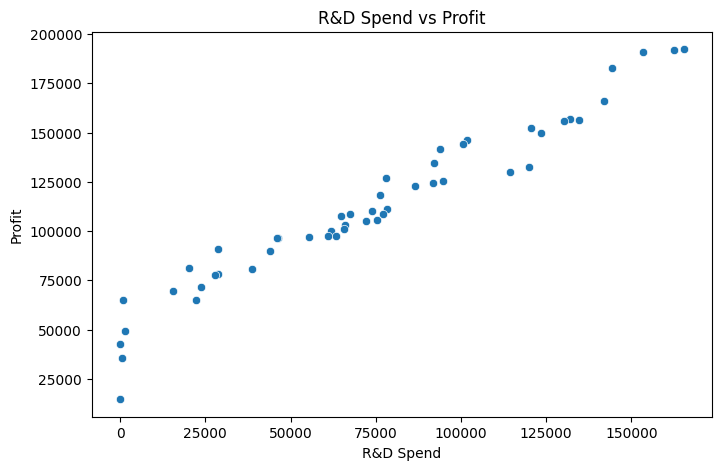

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='R&D Spend', y='Profit', data=company_df)
plt.title('R&D Spend vs Profit')
plt.show()

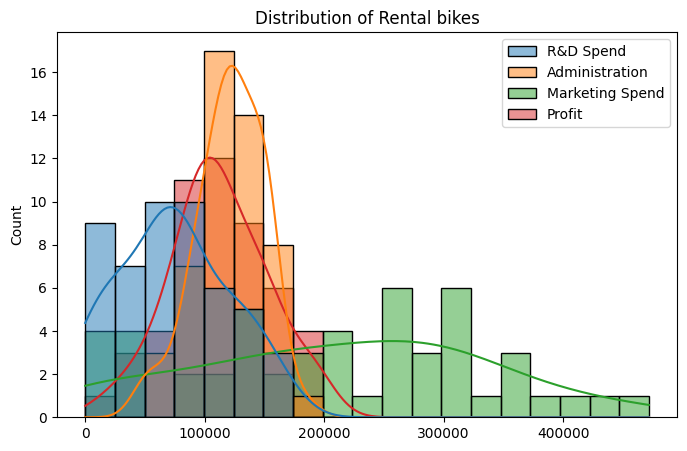

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(company_df, kde=True)
plt.title('Distribution of Rental bikes')
plt.show()

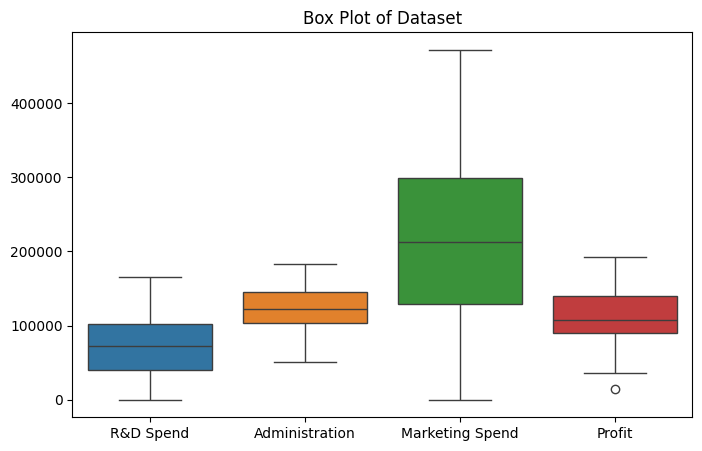

In [ ]:
# Box plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=company_df)
plt.title('Box Plot of Dataset')
plt.show()




In [ ]:
correlation_matrix = company_df.drop(columns = ['State']).corr()
print(correlation_matrix)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


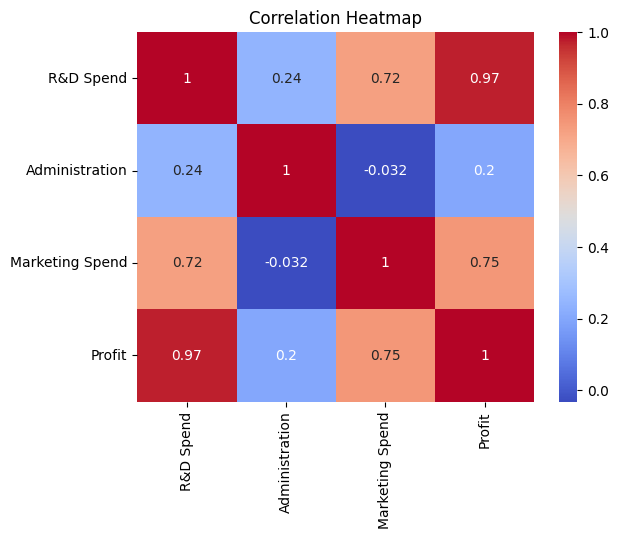

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
company_encoded_df = pd.get_dummies(company_df, columns=['State'])
display(company_encoded_df.head())

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [ ]:
company_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     bool   
 5   State_Florida     50 non-null     bool   
 6   State_New York    50 non-null     bool   
dtypes: bool(3), float64(4)
memory usage: 1.8 KB


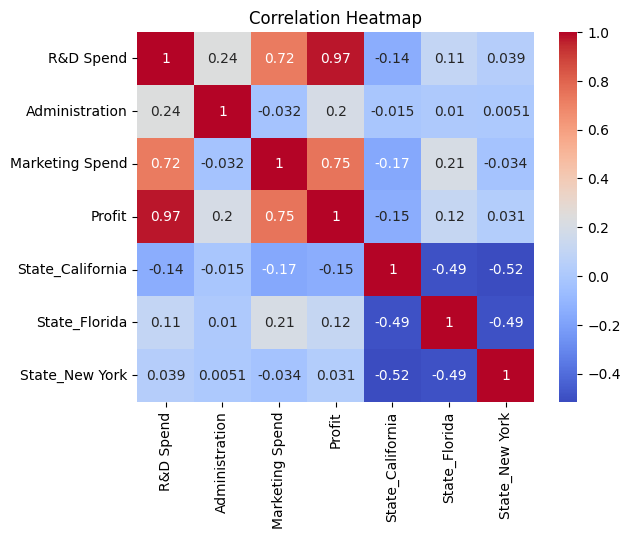

In [ ]:
correlation_matrix = company_encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<br>**Splitting the Data into Train and Test sets**

In [ ]:
X = company_encoded_df.drop(columns = ['Profit'])
y = company_df[['Profit'] ]

In [ ]:
display(X.head())

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


<br>**Scale the feature (YearsExperience) and target (Salary)**

In [ ]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# scaler_X = MinMaxScaler()
# scaler_Y = MinMaxScaler()

In [ ]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_Y.fit_transform(y)

<br>**Train Test Split**

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
print(f"X_train Shape {X_train_scaled.shape}, X_test shape {X_test_scaled.shape}")
print(f"y_train Shape_{y_train_scaled.shape}, y_test shape {y_test_scaled.shape}")

X_train Shape (40, 6), X_test shape (10, 6)
y_train Shape_(40, 1), y_test shape (10, 1)


<br>**Fit the linear regression model**

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

<br>**Make Prediction**

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)

<br>**Accuracy Metrics**

In [ ]:
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse = mse ** 0.5
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Square: {r2}')


Mean Squared Error: 0.05151092768807303
Root Mean Squared Error: 0.22696018965464632
R Square: 0.8987266414319837


<br>**Inverse transform the predicted salaries back to original scale**

In [ ]:
y_pred_original = scaler_Y.inverse_transform(y_pred_scaled)
y_test_orignal = scaler_Y.inverse_transform(y_test_scaled)
X_test_orignal = scaler_X.inverse_transform(X_test_scaled)

<br>**Plotting the original data and the regression line**

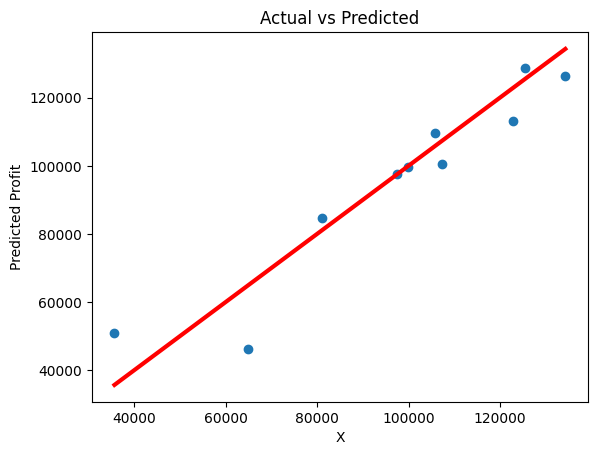

In [ ]:
plt.scatter(y_test_orignal, y_pred_original)
plt.plot([y_test_orignal.min(), y_test_orignal.max()], [y_test_orignal.min(), y_test_orignal.max()], lw=3, color = 'red')
plt.xlabel('X')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted')
plt.show()